In [5]:
import tensorflow as tf


In [7]:
print('tensorflow_version',tf.__version__)

tensorflow_version 2.8.0


In [9]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


In [11]:
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


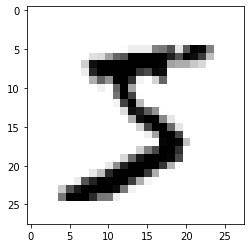

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap='binary')
plt.show()

In [13]:
y_train[0]

5

In [14]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [28]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [29]:
print('y_train_encoded shape',y_train_encoded.shape)
print('y_test_encoded shape',y_test_encoded.shape)

y_train_encoded shape (60000, 10)
y_test_encoded shape (10000, 10)


In [30]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000, 784))
x_test_reshaped = np.reshape(x_test, (10000,784))

print('x_train_reshape',x_train_reshaped.shape)
print('x_test_reshape',x_test_reshaped.shape)

x_train_reshape (60000, 784)
x_test_reshape (10000, 784)


In [32]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [33]:
x_mean =np.mean(x_train_reshaped)
x_std =np.std(x_train_reshaped)

epsilon=1e-10

x_train_norm=(x_train_reshaped - x_mean)/ (x_std +epsilon)
x_test_norm=(x_test_reshaped - x_mean)/ (x_std +epsilon)

In [34]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model= Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [41]:
model.compile(
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train_norm, y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8929
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1847 - accuracy: 0.9464
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1411 - accuracy: 0.9590


In [43]:
loss, accuracy=model.evaluate(x_test_norm, y_test_encoded)

print('Test set accuracy',accuracy*100)

313/313 [==============================] - 1s 1ms/step - loss: 0.1332 - accuracy: 0.9585
Test set accuracy 95.85000276565552


In [44]:
pred= model.predict(x_test_norm)
print('Shape of prediction',pred.shape)

Shape of prediction (10000, 10)


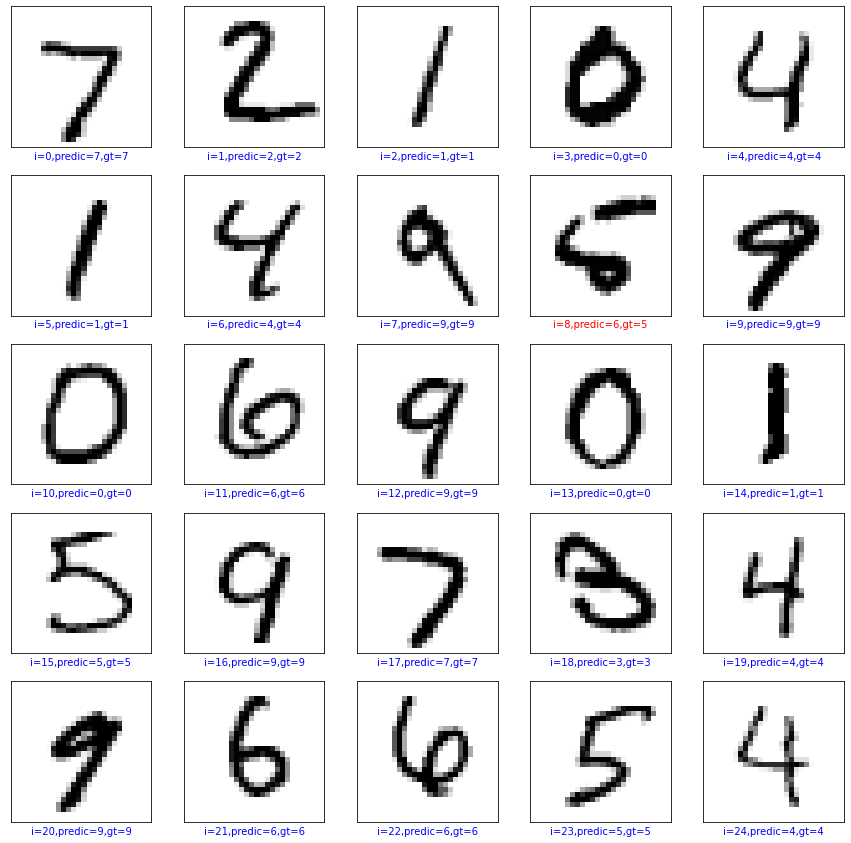

In [46]:
plt.figure(figsize=(15,15))

start_index =0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    predic =np.argmax(pred[start_index+i])
    gt=y_test[start_index+i]
    
    col='b'
    if predic!=gt:
        col='r'
        
    plt.xlabel('i={},predic={},gt={}'.format(start_index+i,predic,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
    
plt.show()

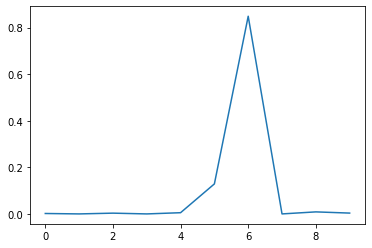

In [49]:
plt.plot(pred[8])
plt.show()